# Twitter Sentiment Analysis

---

## Problem Statement

---

Understanding the problem statement is of prime importance. This would help us get an intuition of what we might be dealing with. Let us see the problem statement -

The aim of this problem is to detect hate speech in tweets. To simplify, we assume that a tweet contains hate speech if it has a racist or sexist sentiments in it. So, our task is to classify racist or sexist tweets from a mixture of tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist i.e. a hate message and label '0' denotes the tweet is not racist/sexist i.e. not a hate message, your objective is to predict the labels on the test dataset.  

The dataset can be found here:  
https://www.kaggle.com/datasets/dv1453/twitter-sentiment-analysis-analytics-vidya?select=train_E6oV3lV.csv

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> numpy : Library for Numeric Computations in Python  
> pandas : Library for Data Acquisition and Preparation  
> matplotlib : Low-level library for Data Visualization  
> seaborn : Higher-level library for Data Visualization  
> re : for applying regular expressions  
> nltk : for Natural Language Processing  
> string : for string manipulation  
> warnings : for controlling warnings  

In [40]:
import re

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import string as str

import nltk

import warnings as warn
warn.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd 
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

### Reading datasets

---

Let us read the train and test data sets using pandas.

In [41]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [42]:
print("Data type : ", type(train))
print("Data dims (train): ", train.shape)
print("Data dims (test): ", test.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims (train):  (31962, 3)
Data dims (test):  (17197, 2)


> Train set has 31,962 tweets and test set has 17,197 tweets with 3 and 2 columns respectively.

Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [43]:
print("Train:")
train.dtypes

Train:


id        int64
label     int64
tweet    object
dtype: object

In [44]:
print("Test:")
test.dtypes

Test:


id        int64
tweet    object
dtype: object

## Data Preparation and Cleaning

---

### Data Inspection

---

We shall inspect expamples of non-hate messages.

In [45]:
train[train['label'] == 0].head(15)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


---

We shall inspect expamples of hate messages.

In [46]:
train[train['label'] == 1].head(15)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Let us see the label-distribution in the training dataset.

In [47]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

> An interesting distribution indeed! We have **29720 (92.985...%)** positive tweets while on the other hand we have **2242 (7.014...%)** hate tweets. So it is a highly imbalanced distribution.

### Changes in the distribution of length

---

We need to check if the distribution of the length of tweets of test data is similar to that of the train data. This is because we do not want our model to be a bad classifier due to not taking care of managing this conrol variable.

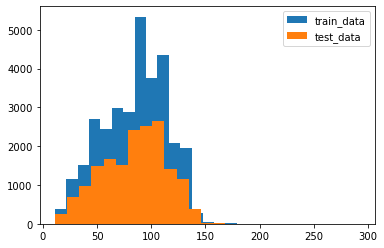

In [48]:
train_len = train['tweet'].str.len()
test_len = test['tweet'].str.len()

plt.hist(train_len, bins=25, label="train_data")
plt.hist(test_len, bins=25, label="test_data")
plt.legend()
plt.show()

> The overall shape of the two distributions are roughly similar. This means we have a well-distributed train-test split.

### Data Cleaning

In [49]:
data = pd.read_csv('train.csv')
data_clean = data.copy()
data_clean

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


Upon initial inspection it seems that the 'id' column is quite redundant, and hence will be dropped. In addition, the following operations will be performed to make the dataset more legible: 
1. Renaming 'tweet' to 'Cleaned Tweet'
2. Reindexing of S/N to start from 1


In [50]:
data_clean.drop(data_clean.columns[0], axis=1, inplace=True) 
data_clean = data_clean.rename(columns = {'tweet':'Cleaned Tweet'})
data_clean.index = np.arange(1, len(data_clean) + 1)
data_clean

,label,Cleaned Tweet
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
5,0,factsguide: society now #motivation
...,...,...
31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31960,0,listening to sad songs on a monday morning otw to work is sad
31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


There seem to be a lot of unconventional characters in our data. To tackle this, we can run a simple for loop and remove non-ascii values from our dataset using the `encode()` and `decode()` functions in Python.

In [51]:
new_values = []

for string in data_clean['Cleaned Tweet']:
    encoded_string = string.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    new_values.append(decode_string)
    
    
data_clean['Cleaned Tweet'] = new_values

data_clean

,label,Cleaned Tweet
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ur!!!
5,0,factsguide: society now #motivation
...,...,...
31958,0,ate @user isz that youuu?
31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31960,0,listening to sad songs on a monday morning otw to work is sad
31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


There still seem to be a lot of anomalous strings in our data, &gt and &amp for instance. We will have to clean these individually. In addition, @user will be removed as it is not pertinent to our analysis. The reformatting of ';' to ',' will also be performed. 

In [52]:
data_clean['Cleaned Tweet'] = data_clean['Cleaned Tweet'].str.replace('&gt;3','')
data_clean['Cleaned Tweet'] = data_clean['Cleaned Tweet'].str.replace('&amp','')
data_clean['Cleaned Tweet'] = data_clean['Cleaned Tweet'].str.replace('--&gt;','')
data_clean['Cleaned Tweet'] = data_clean['Cleaned Tweet'].str.replace('@user','')
data_clean['Cleaned Tweet'] = data_clean['Cleaned Tweet'].str.replace(';',',')
data_clean

,label,Cleaned Tweet
1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
2,0,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ur!!!
5,0,factsguide: society now #motivation
...,...,...
31958,0,ate isz that youuu?
31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31960,0,listening to sad songs on a monday morning otw to work is sad
31961,1,"#sikh #temple vandalised in in #calgary, #wso condemns act"


### Text Normalisation

---

Here we will use `PorterStemmer()` function from the nltk module to normalise tweets. But before that we will have to tokenise the tweets. 

Tokens are individual terms or words, and tokenisation is the process of splitting a string of text into individual tokens.

In [53]:
tweet_tokens = data_clean['Cleaned Tweet'].apply(lambda x: x.split()) # tokenising tweets

In [54]:
tweet_tokens.head()

1                  [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction., #run]
2    [thanks, for, #lyft, credit, i, can't, use, cause, they, don't, offer, wheelchair, vans, in, pdx., #disapointed, #getthanked]
3                                                                                                          [bihday, your, majesty]
4                                                                   [#model, i, love, u, take, with, u, all, the, time, in, ur!!!]
5                                                                                         [factsguide:, society, now, #motivation]
Name: Cleaned Tweet, dtype: object

> We shall normalise tokens and join them back together.

In [55]:
from nltk.stem.porter import *

pStemmer = PorterStemmer()

tweet_tokens = tweet_tokens.apply(lambda x: [pStemmer.stem(i) for i in x]) # stemming

In [56]:
#needs update
from collections import defaultdict

tokenList = set(tweet_tokens[1]) #just tweet tokens throws TypeError

dictionary = defaultdict(set)

for i in tokenList:
    dictionary[pStemmer.stem(i)].add(i)
    print(dictionary)

defaultdict(<class 'set'>, {'when': {'when'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}, 'selfish': {'selfish'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}, 'selfish': {'selfish'}, 'into': {'into'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}, 'selfish': {'selfish'}, 'into': {'into'}, 'he': {'he'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}, 'selfish': {'selfish'}, 'into': {'into'}, 'he': {'he'}, 'is': {'is'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}, 'selfish': {'selfish'}, 'into': {'into'}, 'he': {'he'}, 'is': {'is'}, 'drag': {'drag'}})
defaultdict(<class 'set'>, {'when': {'when'}, 'hi': {'hi'}, 'kid': {'kid'}, 'selfish': {'selfish'}, 'into': {'into'}, 'he': {'he'}, 'is': {'is'}, 'dra

## Story Visualisation and Generation

---

**1. Visualising frequently-used words in tweets: `WordCloud`**

One may wonder, "How well are the sentiments distributed across the train dataset?" For this, we can understand frequently-used words by plotting wordclouds.

A wordcloud is a form of visualisation wherein the size of the word depicts the frequency of usage.

Let us visualise all the words our data using the wordcloud plot.

In [57]:
words = ' '.join([token for token in data_clean['Cleaned Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width= 980, height= 650, random_state=21, max_font_size=120).generate(words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

We can see most of the words are positive or neutral. Words like **love, happy, friend, life, day** etc are most frequently used. 

However, this does not give us any real idea about the words associated with tweets of racist/sexist sentiment. So, for solving this we could plot separate wordclouds for both the classes (racist/sexist or positive) in our train data.

**2. Words in positive tweets**

In [ ]:
positive_words =' '.join([token for token in data_clean['Cleaned Tweet'][data_clean['label'] == 0]])

wordcloud = WordCloud(width=980, height=650, random_state=21, max_font_size=120).generate(positive_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

Most of the frequently-used words seem compatible with the sentiment, i.e, non-racist/sexists (or positive) tweets. Similarly, we will plot the word cloud for the other sentiment. 

We should be expecting to see negative, racist, and sexist tokens.

**3. Words in negative tweets**

In [ ]:
negative_words = ' '.join([token for token in data_clean['Cleaned Tweet'][data_clean['label'] == 1]])
wordcloud = WordCloud(width=980, height=650, random_state=21, max_font_size=120).generate(negative_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

As clearly shown, most of these tokens have negative connotations. So, it seems we have a pretty good amount of text data to work on. Next we will analyse the impact of hashtags/trends in our twitter data.

**4. Understanding the impact of Hashtags on sentiments of tweets**

In [ ]:
# function to collect hashtags
def extract_hashtag(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_positive = extract_hashtag(data_clean['Cleaned Tweet'][data_clean['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = extract_hashtag(data_clean['Cleaned Tweet'][data_clean['label'] == 1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top *n* hashtags. So, first we shall check the hashtags in the positive tweets.

#### Positive Tweets 

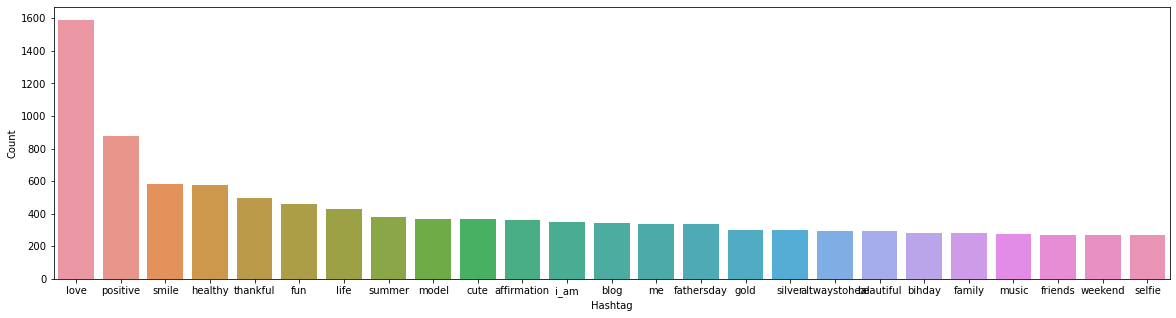

In [ ]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 25 most frequent hashtags     
d = d.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

The above hashtags are positive and the plot makes sense. We would expect negative tokens in the plot of the second list. 
Let us check the most frequent hashtags appearing in the racist/sexist tweets.

#### Negative Tweets

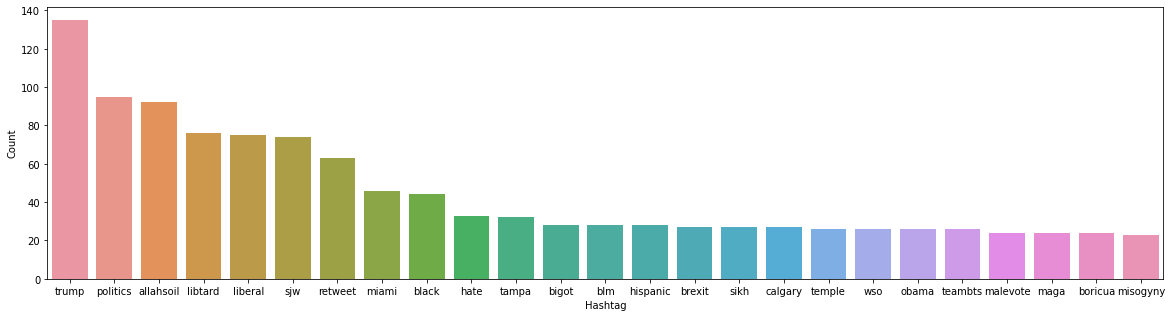

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 25 most frequent hashtags
e = e.nlargest(columns="Count", n = 25)   
plt.figure(figsize=(20,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As we expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain some useful information. Next, we will try to extract features from the tokenised tweets.

## Extracting Features from Tokenised Tweets
---

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

### Bag-Of-Words Features

In [ ]:
BOW_vectoriser = CountVectorizer(max_df=0.90, min_df=2, max_features=1500, stop_words='english')
BOW = BOW_vectoriser.fit_transform(data_clean['Cleaned Tweet'])
BOW.shape

(31962, 1500)

### TF-IDF Features

In [ ]:
tfidf_vectoriser = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1500, stop_words='english')
tfidf = tfidf_vectoriser.fit_transform(data_clean['Cleaned Tweet'])
tfidf.shape

(31962, 1500)

### Word Embeddings

---

**1. Word2Vec Embeddings**

In [ ]:
tweet_tokens = data_clean['Cleaned Tweet'].apply(lambda x: x.split()) # tokenising tweets

model_w2v = gensim.models.Word2Vec(
            tweet_tokens,
            vector_size=500, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 17)

model_w2v.train(tweet_tokens, total_examples= len(data_clean['Cleaned Tweet']), epochs=100)

(29660171, 39494500)

Let us test out a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the dataset.

In [ ]:
model_w2v.wv.most_similar(positive="romantic")

[('candid', 0.5426030158996582),
 ('ci', 0.48457393050193787),
 ('guy,', 0.481329083442688),
 ('#marriedlife', 0.4520012140274048),
 ('couples', 0.43199580907821655),
 ('bride:', 0.4280705749988556),
 ('equate', 0.4046002924442291),
 ('arrives', 0.39930421113967896),
 ('delivery!', 0.3991697430610657),
 ('le', 0.39764589071273804)]

In [ ]:
model_w2v.wv.most_similar(positive="trump")

[('unmasking', 0.4892732501029968),
 ('fuhered', 0.48244017362594604),
 ('suppoer.', 0.47152528166770935),
 ('overwhelmingly', 0.4636531174182892),
 ('ally,', 0.4568559527397156),
 ("thank'", 0.45669761300086975),
 ("chicago's", 0.44863975048065186),
 ("bihday'", 0.4485248029232025),
 ('suppoer', 0.44802165031433105),
 ('#dumptrump', 0.44800856709480286)]

In [ ]:
model_w2v.wv['love']

array([ 0.08461116,  0.18083389, -0.35002545, -0.18046251, -0.06368045,
       -0.20872359, -0.44435373,  0.04884207,  0.04234019, -0.08030106,
        0.10948791,  0.2718789 , -0.05782933, -0.19195347, -0.6580708 ,
       -0.04942732, -0.01705835,  0.05946647, -0.09361463,  0.49597892,
       -0.3626464 ,  0.56441027, -0.31526452,  0.05335667, -0.28474835,
       -0.3215969 ,  0.51068604, -0.01696683, -0.25016564,  0.22147043,
        0.2149814 , -0.22648765,  0.03120968, -0.3665818 ,  0.06394764,
       -0.0666062 , -0.27470753,  0.00241786, -0.1857647 ,  0.00506313,
       -0.29052252,  0.4501743 ,  0.15102248, -0.4038139 ,  0.0097228 ,
        0.17538986,  0.00189823,  0.2475176 , -0.14033933,  0.15439792,
        0.29988417,  0.21389538, -0.13237955, -0.2912413 , -0.18077773,
       -0.6766733 ,  0.01887643,  0.2504163 ,  0.3221837 , -0.0434519 ,
        0.04020887,  0.0693792 ,  0.26788202, -0.08121139,  0.1632874 ,
       -0.00605822,  0.12728125,  0.2533646 , -0.33232376, -0.27

In [ ]:
len(model_w2v.wv['love']) #The length of the vector is 500

500

#### Preparing Vectors for Tweets

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [ ]:
def word_vec(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

#### Preparing word2vec Feature Set

In [ ]:
wordvec_arrays = np.zeros((len(tweet_tokens), 500))

for i in range(len(tweet_tokens)):
    wordvec_arrays[i,:] = word_vec(tweet_tokens[i+1], 500)

wordvec = pd.DataFrame(wordvec_arrays)
wordvec.shape

(31962, 500)

> Now we have 500 new features, whereas in Bag of Words and TF-IDF we had 1500 features.

**2. Doc2Vec Embedding**

Let us load the required libraries.

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

To implement doc2vec, we need to **labelise** or **tag** each tokenised tweet with unique IDs. We can do so by using Gensim’s `TaggedDocument()` function.

In [ ]:
def add_label(twt):
    output = []
    counter = 0
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, tags = [counter]))
        counter += 1
    #output.append(TaggedDocument(twt, tags=[str(i)]) for i, _d in zip(twt.index, twt))
    return output

In [ ]:
tweet_label = add_label(tweet_tokens) # label all the tweets

Let's have a look at the result.

In [ ]:
tweet_label[:11]

[TaggedDocument(words=['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=[0]),
 TaggedDocument(words=['thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=[1]),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=[2]),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'ur!!!'], tags=[3]),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=[4]),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'], tags=[5]),
 TaggedDocument(words=['camping', 'tomorrow', 'danny'], tags=[6]),
 TaggedDocument(words=['the', 'next', 'school', 'year', 'is', 'the', 'year', 'for', 

Now let's train a `doc2vec` model.

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  vector_size=500, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 46)

model_d2v.build_vocab([i for i in tqdm(tweet_label)])

100%|██████████████████████████████████████████████████████████████| 31962/31962 [00:00<00:00, 1957885.01it/s]


In [ ]:
model_d2v.train(tweet_label, total_examples= len(data_clean['Cleaned Tweet']), epochs=100)

#### Preparing doc2vec Feature Set

In [ ]:
docvec_arrays = np.zeros((len(tweet_tokens), 500))

for i in range(len(data_clean)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,500))
    
docvec = pd.DataFrame(docvec_arrays)
docvec.shape



(31962, 500)

---
## Model Building

---

We are now done with all the pre-modelling stages required to get the data in the proper form and shape. We shall be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. The following algorithms would be used to build models:

1. **Support Vector Machine** 

2. **Logistic Regression** 

3. **RandomForest** 

4. **XGBoost** 

### 1. Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Bag-of-Words Features

In [ ]:
train_bow = BOW[:31962,:]
test_bow = BOW[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5557491289198607

Let us create a submission csv file for this.

In [ ]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission_svc_bow.csv', index=False)  # NEEDS FIX

ValueError: Found array with 0 sample(s) (shape=(0, 1500)) while a minimum of 1 is required.

#### TF-IDF Features

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5443478260869565

#### Word2Vec Features

In [ ]:
train_w2v = wordvec.iloc[:31962,:]
test_w2v = wordvec.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

NameError: name 'ytrain' is not defined

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'svm' is not defined

#### Doc2Vec Features

In [ ]:
train_d2v = docvec.iloc[:31962,:]
test_d2v = docvec.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

NameError: name 'docvec' is not defined

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'svm' is not defined

### 4. XGBoost

In [ ]:
from xgboost import XGBClassifier

#### Bag-Of-Words Features

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

Let us create a prediction submission file.

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('submission_xgb_bow.csv', index=False)

#### TF-IDF Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

#### Word2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

#### Doc2Vec Features 

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)